## BDOS PROJECT  2019-2020
 -  Vikranth Ale [1873995]
### CLASSIFICATION OF CORONARY HEART DISEASE STUDY USING NEURAL NETWORKS

In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install -q tensorflow-gpu --upgrade

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 35.1MB/s 
     |████████████████████████████████| 450kB 55.2MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/chd/framingham.csv'

In [0]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Flatten
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 1. Importing the Dataset

The dataset is taken from edX website to understand the ten year CHD for framingham heart disease. Here is the URL:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/framdoc.pdf

https://prod-edxapp.edx-cdn.org/assets/courseware/v1/7022cf016eefb6d3747447589423dab0/asset-v1:MITx+15.071x+3T2018+type@asset+block/framingham.csv

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels and many others. To data, all published studies using this data focus on a subset of 15 attributes - so we will do the same. 

To import the necessary data, we will use pandas' built in read_csv() function. Let's get started!

In [7]:
# read the csv
data = pd.read_csv(path)
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (4240, 16)
male                 0.00
age                 46.00
education            2.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            250.00
sysBP              121.00
diaBP               81.00
BMI                 28.73
heartRate           95.00
glucose             76.00
TenYearCHD           0.00
Name: 1, dtype: float64


In [9]:
# print the first ten 
data.loc[:10]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
#checking for NA 
print(data.shape)
data.isna().sum()

(4240, 16)


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.shape

(3658, 16)

In [12]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(3658, 16)
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [13]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [14]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


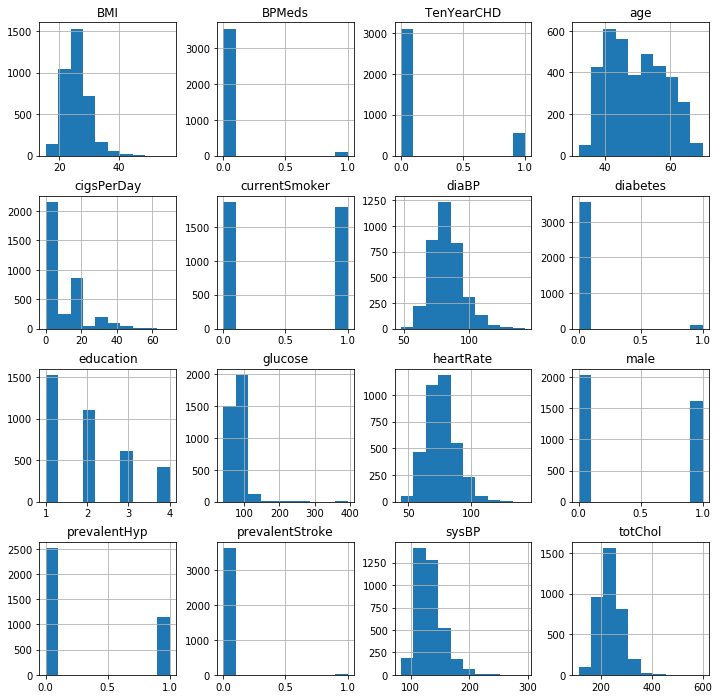

In [15]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

Furthermore, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0]. 

In [0]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [0]:
# create X and Y datasets for training
from sklearn.model_selection import train_test_split

X = np.array(data.drop(['TenYearCHD'], 1))
y = np.array(data['TenYearCHD'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [17]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(2926, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Using TensorFlow backend.


### 3. Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [18]:
from tensorflow.keras import Sequential, layers, metrics, losses, optimizers 
from tensorflow.keras.layers import Dense

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=10)

Train on 2926 samples, validate on 732 samples
Epoch 1/200
2926/2926 [==============================] - 3s 941us/sample - loss: 0.5090 - accuracy: 0.8336 - val_loss: 0.4852 - val_accuracy: 0.8456
Epoch 2/200
2926/2926 [==============================] - 1s 341us/sample - loss: 0.4424 - accuracy: 0.8472 - val_loss: 0.4351 - val_accuracy: 0.8470
Epoch 3/200
2926/2926 [==============================] - 1s 408us/sample - loss: 0.4305 - accuracy: 0.8489 - val_loss: 0.4345 - val_accuracy: 0.8443
Epoch 4/200
2926/2926 [==============================] - 1s 370us/sample - loss: 0.4242 - accuracy: 0.8489 - val_loss: 0.4348 - val_accuracy: 0.8456
Epoch 5/200
2926/2926 [==============================] - 1s 404us/sample - loss: 0.4231 - accuracy: 0.8486 - val_loss: 0.4752 - val_accuracy: 0.8443
Epoch 6/200
2926/2926 [==============================] - 1s 352us/sample - loss: 0.4158 - accuracy: 0.8496 - val_loss: 0.4297 - val_accuracy: 0.8456
Epoch 7/200
2926/2926 [==============================] - 1s

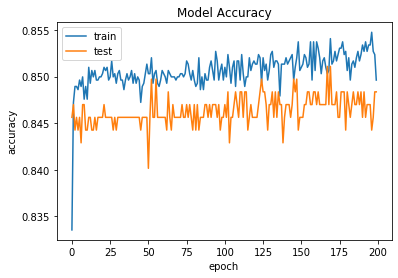

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig( 'ModelAccuracy.png', bbox_inches='tight')
plt.show()

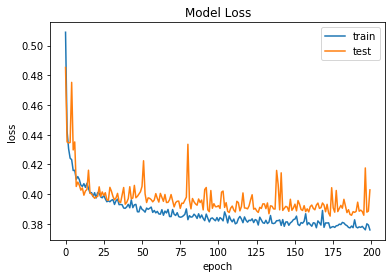

In [21]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig( 'loss.png', bbox_inches='tight')
plt.show()

### 4. Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease. Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [23]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [39]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=200, batch_size=10)

Train on 2926 samples, validate on 732 samples
Epoch 1/200
2926/2926 [==============================] - 1s 476us/sample - loss: 0.4681 - accuracy: 0.8411 - val_loss: 0.4802 - val_accuracy: 0.8470
Epoch 2/200
2926/2926 [==============================] - 1s 336us/sample - loss: 0.4508 - accuracy: 0.8479 - val_loss: 0.5063 - val_accuracy: 0.8470
Epoch 3/200
2926/2926 [==============================] - 1s 339us/sample - loss: 0.4480 - accuracy: 0.8479 - val_loss: 0.4601 - val_accuracy: 0.8470
Epoch 4/200
2926/2926 [==============================] - 1s 391us/sample - loss: 0.4395 - accuracy: 0.8479 - val_loss: 0.4803 - val_accuracy: 0.8470
Epoch 5/200
2926/2926 [==============================] - 1s 352us/sample - loss: 0.4404 - accuracy: 0.8479 - val_loss: 0.4635 - val_accuracy: 0.8470
Epoch 6/200
2926/2926 [==============================] - 1s 379us/sample - loss: 0.4372 - accuracy: 0.8479 - val_loss: 0.4602 - val_accuracy: 0.8470
Epoch 7/200
2926/2926 [==============================] - 1s

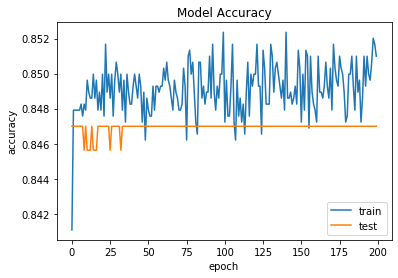

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('binary_model_accuracy',bbox_inches='tight')
plt.show()

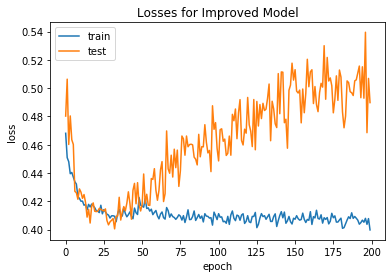

In [42]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses for Improved Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('losses_binary_model',bbox_inches='tight')
plt.show()

### 5. Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility. 

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [43]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.8483606557377049
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       620
           1       0.52      0.11      0.18       112

    accuracy                           0.85       732
   macro avg       0.69      0.54      0.55       732
weighted avg       0.81      0.85      0.80       732



In [44]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8469945355191257
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       620
           1       0.00      0.00      0.00       112

    accuracy                           0.85       732
   macro avg       0.42      0.50      0.46       732
weighted avg       0.72      0.85      0.78       732



In [0]:
binary_model.predict([X_test])

array([[0.05017474],
       [0.0272656 ],
       [0.29595095],
       [0.16387019],
       [0.317008  ],
       [0.05637991],
       [0.09224506],
       [0.10323066],
       [0.14710785],
       [0.54550064],
       [0.02659372],
       [0.0905126 ],
       [0.20856862],
       [0.06586063],
       [0.05971789],
       [0.01747127],
       [0.04194878],
       [0.03217986],
       [0.15412213],
       [0.09741048],
       [0.05704672],
       [0.19293602],
       [0.15412213],
       [0.15412213],
       [0.04432122],
       [0.11106049],
       [0.30619872],
       [0.03856571],
       [0.04628485],
       [0.05329797],
       [0.13388686],
       [0.12573832],
       [0.12561527],
       [0.02162875],
       [0.05044924],
       [0.1253133 ],
       [0.16037352],
       [0.01160729],
       [0.02786151],
       [0.03515858],
       [0.04444864],
       [0.2320798 ],
       [0.3278551 ],
       [0.11643769],
       [0.26733112],
       [0.16900457],
       [0.11096595],
       [0.154